## Average True Range

Average True Range (ATR)는 주식, 외환, 상품 등의 금융 자산의 변동성을 측정하는 기술적 분석 도구다. 이 지표는 웰스 와일더(Welles Wilder)에 의해 개발되었으며, 주로 시장의 변동성을 이해하고 거래 전략을 설정하는 데 사용된다. ATR은 특정 기간 동안 각 거래일의 가격 범위의 평균을 계산함으로써 자산의 일일 가격 변동 폭을 나타낸다.

ATR의 계산은 다음과 같이 세 가지 주요 구성 요소를 포함한다

1. 현재 고가와 저가 사이의 차이

$$H_t - L_t$$

2. 현재 고가와 이전 종가 사이의 차이

$$|H_t - C_{t-1}|$$

3. 현재 저가와 이전 종가 사이의 차이

$$|L_t - C_{t-1}|$$

이 세 값 중에서 가장 큰 값이 그날의 'True Range'로 선택된다. ATR은 이 'True Range'들을 사용자가 지정한 일정 기간(일반적으로 14일) 동안 평균내어 계산된다.

ATR이 높으면 자산의 가격 변동성이 크다는 것을 나타내며, 이는 시장이 불안정하거나 큰 가격 변동이 있을 수 있음을 의미한다. 반대로 ATR이 낮으면 변동성이 낮아 시장이 안정적이거나 작은 가격 변동만 있을 것임을 나타낸다.

ATR은 주로 거래 진입 및 퇴출 시점을 결정하고, 주문의 정지 손실(stop-loss) 수준을 설정하는 데 활용된다. 예를 들어, 트레이더들은 종종 ATR 값을 기반으로 한 정지 손실 거리를 설정하여 자신의 포지션을 시장의 불필요한 소음으로부터 보호하며, 이를 통해 더 효과적인 위험 관리를 수행할 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volatility import average_true_range
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
atr = average_true_range(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 14,
    fillna = True
)

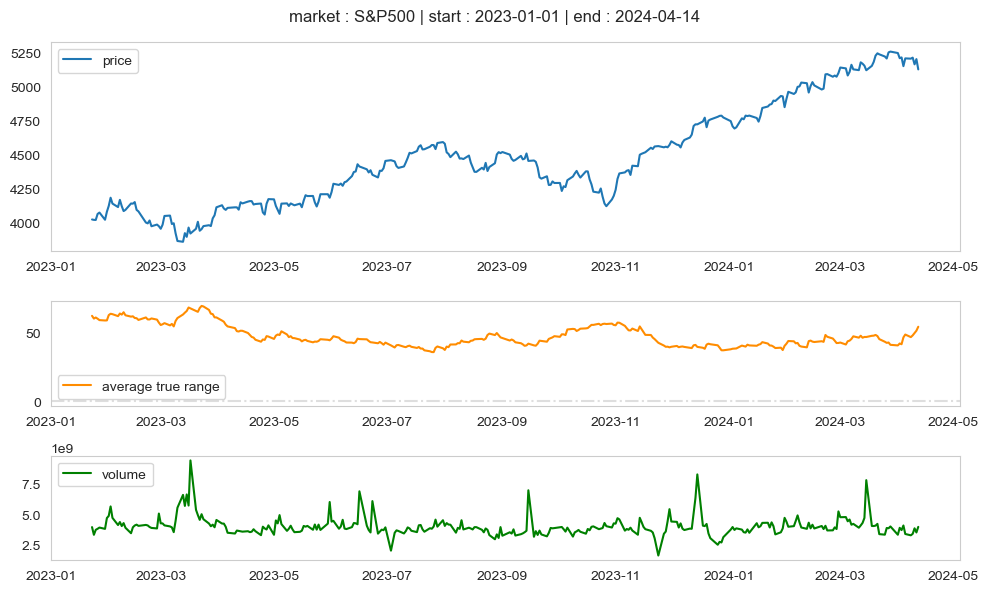

In [9]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][13:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(atr[13:], color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['average true range'])

plt.subplot(gs[2])
plt.plot(data['Volume'][13:], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()